## Assignment 02a - Linear Regression, Regularization and Polynomial Regression

Group:

*  Jannik Bucher
*  Dennis Imhof

### Using dataset: SkillCraft1 Master Table Dataset
[SkillCraft1 on UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/SkillCraft1+Master+Table+Dataset#)

#### Notes:

* Typically "LeagueIndex" is used as the response variable. Since "LeagueIndex" is a categorical (ordinal) variable and we are supposed to perform linear regression, we will predict APM (actions per minute) from the most promising variables. 


* Also, we will split the data into train and test set and perform cross-validation on the training data instead of splitting the training data into fixed train/validation sets.

### Assignments

Before performing the practical work, you need download the dataset accordingly to the option on your machine (or cloud service)
1. Write a program that splits the original sample into a training set and a test set (training set, validation set, test set) with train_test_split method of Skikit Learn library

2. Using the scikit-learn library (http://scikit-learn.org/stable/), train the linear regression model for the training sample (example: http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py)
3. Check the accuracy of the model from the test set

4. Build a model using a polynomial function (example: http://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html#sphx-glr-auto-examples-model-selection-plot-underfitting-overfitting-py). Build plots with the dependence of the error on the degree of the polynomial function.

5. Build a model using regularization (example: http://scikit-learn.org/stable/modules/linear_model.html). On the basis of experiments, select parameters for regularization. Build plots with the dependence of the error on the regularization coefficient.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import cross_val_predict, cross_val_score, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LassoCV, RidgeCV, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv("data/SkillCraft1_Dataset.csv")

### EDA

In [3]:
df.head()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.0,0.000000
1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001194,5,0.0,0.000208
2,56,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.0,0.000189
3,57,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.0,0.000384
4,58,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.0,0.000019


In [4]:
df.describe()

,GameID,LeagueIndex,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
count,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000
mean,4805.012371,4.184094,117.046947,0.004299,0.000374,4.364654,0.000098,0.000387,0.003463,40.361562,63.739403,5.272988,22.131664,0.001032,6.534021,0.000059,0.000142
std,2719.944851,1.517327,51.945291,0.005284,0.000225,2.360333,0.000166,0.000377,0.000992,17.153570,19.238869,1.494835,7.431719,0.000519,1.857697,0.000111,0.000265
min,52.000000,1.000000,22.059600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000679,6.666700,24.093600,2.038900,5.000000,0.000077,2.000000,0.000000,0.000000
25%,2464.500000,3.000000,79.900200,0.001258,0.000204,3.000000,0.000000,0.000140,0.002754,28.957750,50.446600,4.272850,17.000000,0.000683,5.000000,0.000000,0.000000
50%,4874.000000,4.000000,108.010200,0.002500,0.000353,4.000000,0.000040,0.000281,0.003395,36.723500,60.931800,5.095500,22.000000,0.000905,6.000000,0.000000,0.000020
75%,7108.500000,5.000000,142.790400,0.005133,0.000499,6.000000,0.000119,0.000514,0.004027,48.290500,73.681300,6.033600,27.000000,0.001259,8.000000,0.000086,0.000181
max,10095.000000,8.000000,389.831400,0.043088,0.001752,10.000000,0.003019,0.004041,0.007971,237.142900,176.372100,18.558100,58.000000,0.005149,13.000000,0.000902,0.003084


In [5]:
# No missing values in any of the columns
df.isnull().any()

GameID                  False
LeagueIndex             False
Age                     False
HoursPerWeek            False
TotalHours              False
APM                     False
SelectByHotkeys         False
AssignToHotkeys         False
UniqueHotkeys           False
MinimapAttacks          False
MinimapRightClicks      False
NumberOfPACs            False
GapBetweenPACs          False
ActionLatency           False
ActionsInPAC            False
TotalMapExplored        False
WorkersMade             False
UniqueUnitsMade         False
ComplexUnitsMade        False
ComplexAbilitiesUsed    False
dtype: bool

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3395 entries, 0 to 3394
Data columns (total 20 columns):
GameID                  3395 non-null int64
LeagueIndex             3395 non-null int64
Age                     3395 non-null object
HoursPerWeek            3395 non-null object
TotalHours              3395 non-null object
APM                     3395 non-null float64
SelectByHotkeys         3395 non-null float64
AssignToHotkeys         3395 non-null float64
UniqueHotkeys           3395 non-null int64
MinimapAttacks          3395 non-null float64
MinimapRightClicks      3395 non-null float64
NumberOfPACs            3395 non-null float64
GapBetweenPACs          3395 non-null float64
ActionLatency           3395 non-null float64
ActionsInPAC            3395 non-null float64
TotalMapExplored        3395 non-null int64
WorkersMade             3395 non-null float64
UniqueUnitsMade         3395 non-null int64
ComplexUnitsMade        3395 non-null float64
ComplexAbilitiesUsed    3395 non

In [7]:
# Though there were no None values in the dataset, closer inspection reveals missing values marked with "?"
# Convert the object-variables to numeric and set the missing values to None
missing_features = ["Age", "HoursPerWeek", "TotalHours"]

for col in missing_features:
    df[col] = pd.to_numeric(df[col], errors="coerce")

In [8]:
df.isna().sum()

GameID                   0
LeagueIndex              0
Age                     55
HoursPerWeek            56
TotalHours              57
APM                      0
SelectByHotkeys          0
AssignToHotkeys          0
UniqueHotkeys            0
MinimapAttacks           0
MinimapRightClicks       0
NumberOfPACs             0
GapBetweenPACs           0
ActionLatency            0
ActionsInPAC             0
TotalMapExplored         0
WorkersMade              0
UniqueUnitsMade          0
ComplexUnitsMade         0
ComplexAbilitiesUsed     0
dtype: int64

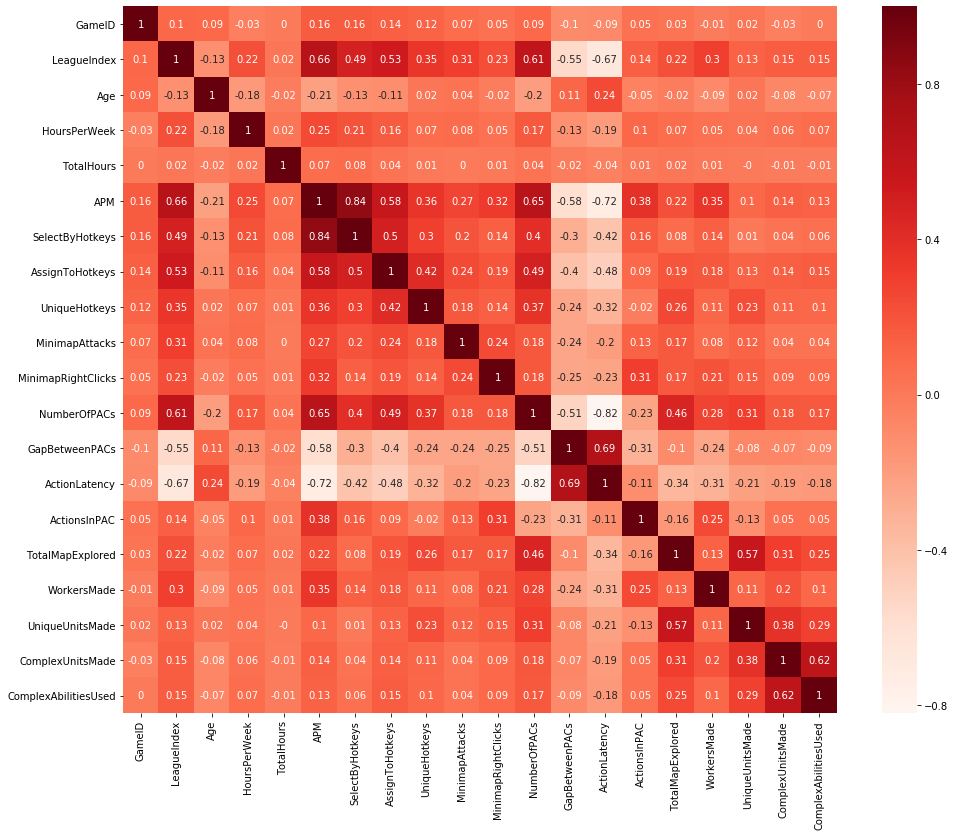

In [9]:
# Let's see if we find interessting patterns in a heatmap visualizing the correlation matrix
plt.figure(figsize=(16,13))
cor = df.corr().round(2)
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [10]:
# Get the variables highly correlated with the response variable
cor_response = abs(cor["APM"])
relevant_features = cor_response[cor_response>0.5].drop("APM")
relevant_features

LeagueIndex        0.66
SelectByHotkeys    0.84
AssignToHotkeys    0.58
NumberOfPACs       0.65
GapBetweenPACs     0.58
ActionLatency      0.72
Name: APM, dtype: float64

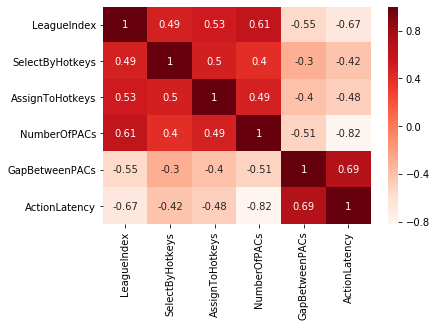

In [11]:
# Visualize the correlation between the relevant features
corr_pred = df[relevant_features.index].corr().round(2)
sns.heatmap(corr_pred, annot=True, cmap=plt.cm.Reds)
plt.show()

### Splitting the dataset into train/validation/test

Before doing any modeling

In [12]:
train_X, test_X, train_y, test_y = train_test_split(df.drop("APM",axis=1), df["APM"], train_size=0.8, random_state=42)

### Feature normalization

In [13]:
remaining_features = train_X.columns.drop(missing_features)

numeric_transformer = Pipeline([('scale', StandardScaler())])
imputer = Pipeline([('impute', SimpleImputer(strategy='median')), 
                     ('scale', numeric_transformer)])



preprocessor = ColumnTransformer(
    transformers=[
        ('imp', imputer, missing_features),
        ('num', numeric_transformer, remaining_features)])

In [14]:
train_X = pd.DataFrame(preprocessor.fit_transform(train_X), columns=train_X.columns)

In [15]:
train_X.describe()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
count,2.716000e+03,2.716000e+03,2.716000e+03,2.716000e+03,2.716000e+03,2.716000e+03,2.716000e+03,2.716000e+03,2.716000e+03,2.716000e+03,2.716000e+03,2.716000e+03,2.716000e+03,2.716000e+03,2.716000e+03,2.716000e+03,2.716000e+03,2.716000e+03,2.716000e+03
mean,-2.972790e-16,3.548135e-17,-1.050970e-16,-1.120851e-16,-3.364188e-17,8.301124e-17,-8.038489e-17,-5.812729e-17,-1.153144e-16,-1.258811e-16,-9.197356e-20,2.254783e-16,7.107257e-16,9.499846e-17,-2.457942e-16,3.968148e-17,2.280944e-17,-2.787412e-16,-2.003678e-17
std,1.000184e+00,1.000184e+00,1.000184e+00,1.000184e+00,1.000184e+00,1.000184e+00,1.000184e+00,1.000184e+00,1.000184e+00,1.000184e+00,1.000184e+00,1.000184e+00,1.000184e+00,1.000184e+00,1.000184e+00,1.000184e+00,1.000184e+00,1.000184e+00,1.000184e+00
min,-1.363021e+00,-1.315350e+00,-5.287988e-02,-1.779399e+00,-2.104066e+00,-8.307951e-01,-1.677631e+00,-1.866150e+00,-5.806462e-01,-1.025473e+00,-2.801613e+00,-1.917108e+00,-2.047678e+00,-2.132266e+00,-2.314673e+00,-1.825463e+00,-2.441983e+00,-5.367249e-01,-5.320214e-01
25%,-6.331381e-01,-6.502364e-01,-3.740366e-02,-8.486454e-01,-7.894483e-01,-5.818109e-01,-7.536533e-01,-5.950089e-01,-5.806462e-01,-6.537659e-01,-7.191526e-01,-6.705181e-01,-6.927804e-01,-6.656240e-01,-7.050841e-01,-6.721640e-01,-8.337324e-01,-5.367249e-01,-5.320214e-01
50%,-1.465498e-01,-3.176797e-01,-2.698197e-02,5.168607e-02,-1.321394e-01,-3.448266e-01,-9.823826e-02,-1.712952e-01,-3.473055e-01,-2.739262e-01,-6.801996e-02,-2.138966e-01,-1.487731e-01,-1.135236e-01,-3.442205e-02,-2.398668e-01,-2.976488e-01,-5.367249e-01,-4.547275e-01
75%,5.833327e-01,3.474335e-01,-1.134942e-02,8.476730e-01,5.251695e-01,1.820376e-01,5.668545e-01,6.761323e-01,1.112131e-01,3.344726e-01,5.768667e-01,4.429944e-01,5.251209e-01,5.183354e-01,6.362400e-01,4.334208e-01,7.745184e-01,2.393433e-01,1.565407e-01
max,5.449216e+00,1.265203e+01,5.205544e+01,1.945471e+00,2.497096e+00,7.395625e+00,6.141420e+00,2.370987e+00,1.697499e+01,9.483518e+00,4.487375e+00,1.121705e+01,5.845117e+00,8.977585e+00,4.794345e+00,7.785008e+00,3.454937e+00,7.484828e+00,1.084133e+01


### Backward Selection

In the correlation matrix above we can see that many of the promising features seem to be correlated. Thus we will use backward selection to weed out the features where our null-hypothesis

$$H_0: \omega_i = 0$$

cannot be rejected, because of a p-value > 5%. Hereby $\omega_i$ is the slope estimate of the OLS linear regression. 

In [16]:
import statsmodels.api as sm
# Perform backward selection and see which variables will remain with p-value < 5%

predictors = list(train_X.columns)
while len(predictors) > 0:
    X_1 = sm.add_constant(train_X[predictors].values)
    model = sm.OLS(train_y,X_1).fit()
    
    p_values = pd.Series(model.pvalues.values[1:], index = predictors)      
    pmax = np.max(p_values)
    feature_with_p_max = p_values.idxmax()
    if(pmax>0.05):
        predictors.remove(feature_with_p_max)
    else:
        break
        
print(predictors)    

['GameID', 'SelectByHotkeys', 'MinimapAttacks', 'MinimapRightClicks', 'NumberOfPACs', 'ActionLatency', 'ActionsInPAC', 'WorkersMade', 'UniqueUnitsMade', 'ComplexAbilitiesUsed']


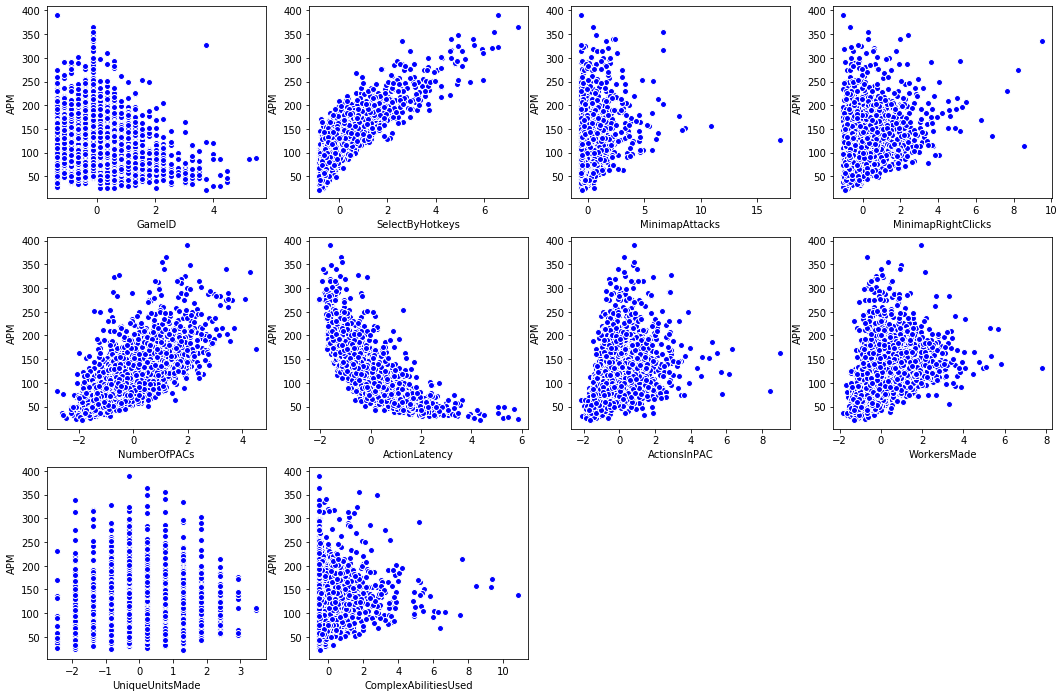

In [17]:
# Plot the distributions of the relevant variables vs the response variable

fig = plt.figure(figsize=(18,12))
for i,col in enumerate(predictors):
    ax = plt.subplot(np.ceil(len(predictors)/4), 4, i+1)
    ax.set_xlabel(col)
    ax.set_ylabel("APM")
    plt.plot(train_X[col], train_y, 'bo', mec='w')
#sns.pairplot(df_scaled, x_vars=predictors, y_vars=["APM"])
plt.show()

Judging from the pairplots of the response variable vs scaled features, it seems that 

*  SelectByHotkeys and NumberOfPACs are good choices for a linear fit
*  ActionLatency might be a good choice for a polynomial fit

In [18]:
def plot_regression(predictors, degrees, height=32):
    plt.figure(figsize=(25, height))
    j = 0
    for predictor in predictors:
        for i in range(len(degrees)):
            j += 1
            ax = plt.subplot(np.ceil(len(degrees)*len(predictors)/5), 5, j)

            polynomial_features = PolynomialFeatures(degree=degrees[i],
                                                 include_bias=False)
            linear_regression = LinearRegression()
            pipeline = Pipeline([("polynomial_features", polynomial_features),
                             ("linear_regression", linear_regression)])
            pipeline.fit(train_X[[predictor]], train_y)

            # Evaluate the models using crossvalidation
            scores = cross_val_score(pipeline, train_X[[predictor]], train_y,
                                 scoring="neg_mean_squared_error", cv=10)

            xs = np.linspace(np.min(train_X[predictor]), np.max(train_X[predictor]), 100)
            plt.plot(xs, pipeline.predict(xs.reshape(-1,1)), 'r-', label="Model")
            plt.scatter(train_X[[predictor]], train_y, edgecolor='b', s=20, label="Samples")
            ax.set_xlabel(predictor)
            ax.set_ylabel("APM")        
            plt.legend(loc="best")
            plt.title("Degree {}\nMSE = {:.4f} (+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))
    plt.show()

### Linear Regression

In [19]:
errors = {}
coef = {}
intercept = {}

for predictor in predictors:
    lr = LinearRegression()
    errors[predictor] = np.mean(-cross_val_score(lr, train_X[[predictor]], train_y, cv=10, scoring="neg_mean_squared_error"))

errors = pd.Series(list(errors.values()), index=errors.keys())
print("Mean Squared Errors (MSE)")
print(errors)

Mean Squared Errors (MSE)
GameID                  2541.843650
SelectByHotkeys          800.692204
MinimapAttacks          2445.167153
MinimapRightClicks      2365.194541
NumberOfPACs            1495.361317
ActionLatency           1259.970131
ActionsInPAC            2269.615395
WorkersMade             2286.047163
UniqueUnitsMade         2618.198413
ComplexAbilitiesUsed    2596.847473
dtype: float64


As expected by the pairplots SelectByHotkeys has the lowest MSE by far. Let's see the scatterplots and fitted models.

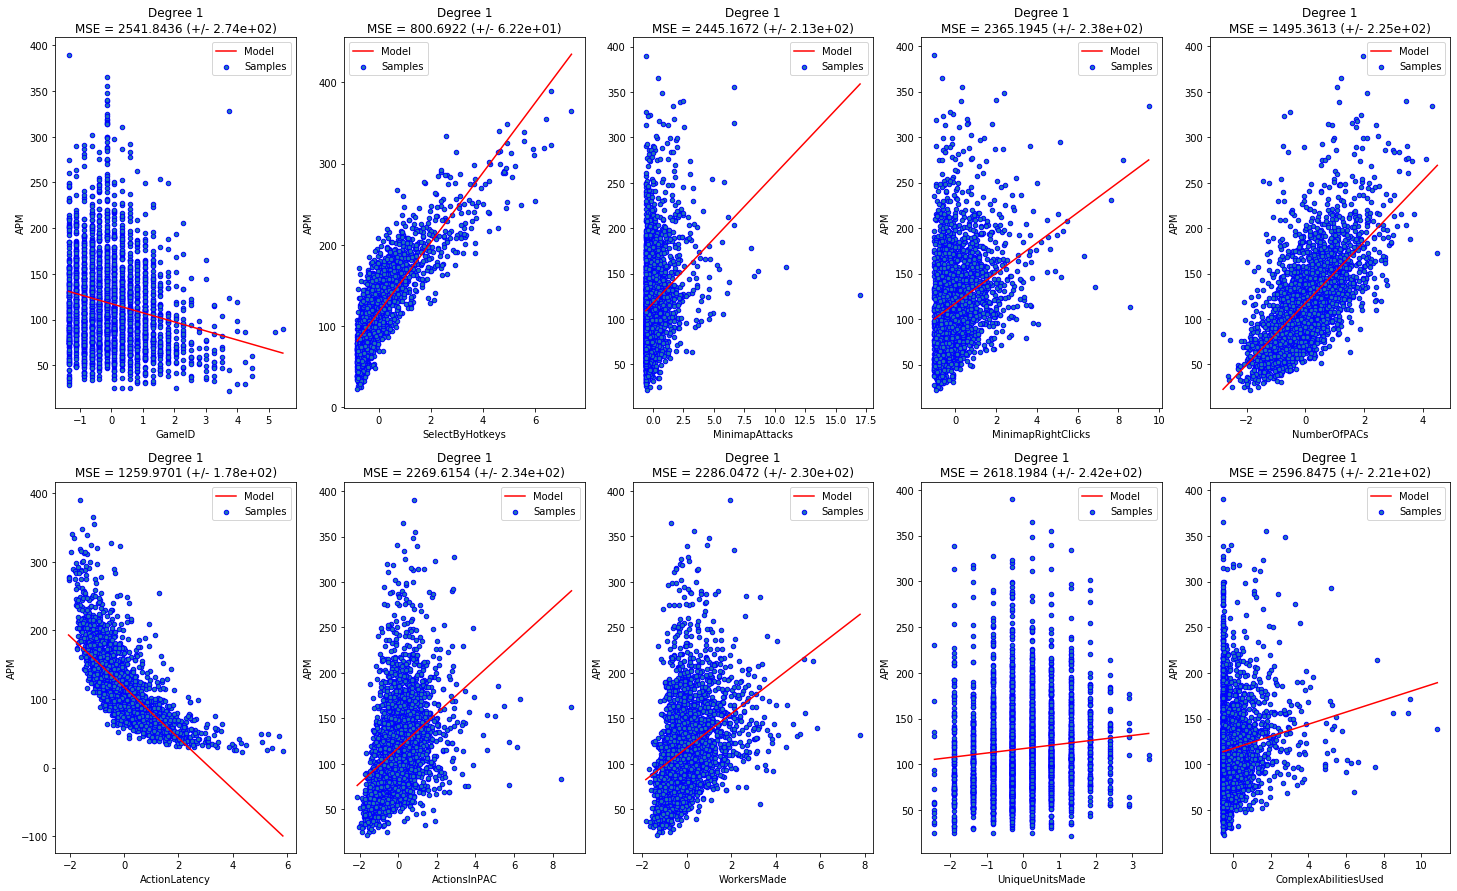

In [20]:
plot_regression(predictors, [1], 15)

### Polynomial Regression

Now let's see which features will perform best in a polynomial regression.

In [21]:
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

errors = {}
best_degree = {}

for predictor in predictors:
    poly_params = {'polynomialfeatures__degree': range(1,10)}
    poly_grid = GridSearchCV(PolynomialRegression(), poly_params,
                         cv=3, n_jobs=-1, scoring="neg_mean_squared_error")

    fit = poly_grid.fit(train_X[[predictor]], train_y)
    
    errors[predictor] = -fit.best_score_
    best_degree[predictor] = fit.best_params_["polynomialfeatures__degree"]



/home/snbl/HDD/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/snbl/HDD/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/snbl/HDD/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/snbl/HDD/anaconda3/lib/python3.7/site-packages/sklearn/mod

In [22]:
best_poly = pd.DataFrame(errors.values(), index=list(errors.keys()), columns=["MSE"])
best_poly["Degree"] = best_degree.values()
best_poly.sort_values("MSE")

,MSE,Degree
SelectByHotkeys,654.493598,4
ActionLatency,959.157374,5
NumberOfPACs,1492.644516,2
ActionsInPAC,2139.333205,3
WorkersMade,2182.349452,4
MinimapRightClicks,2359.703289,3
MinimapAttacks,2429.472090,2
GameID,2514.261008,3
ComplexAbilitiesUsed,2582.700209,5
UniqueUnitsMade,2619.616374,1


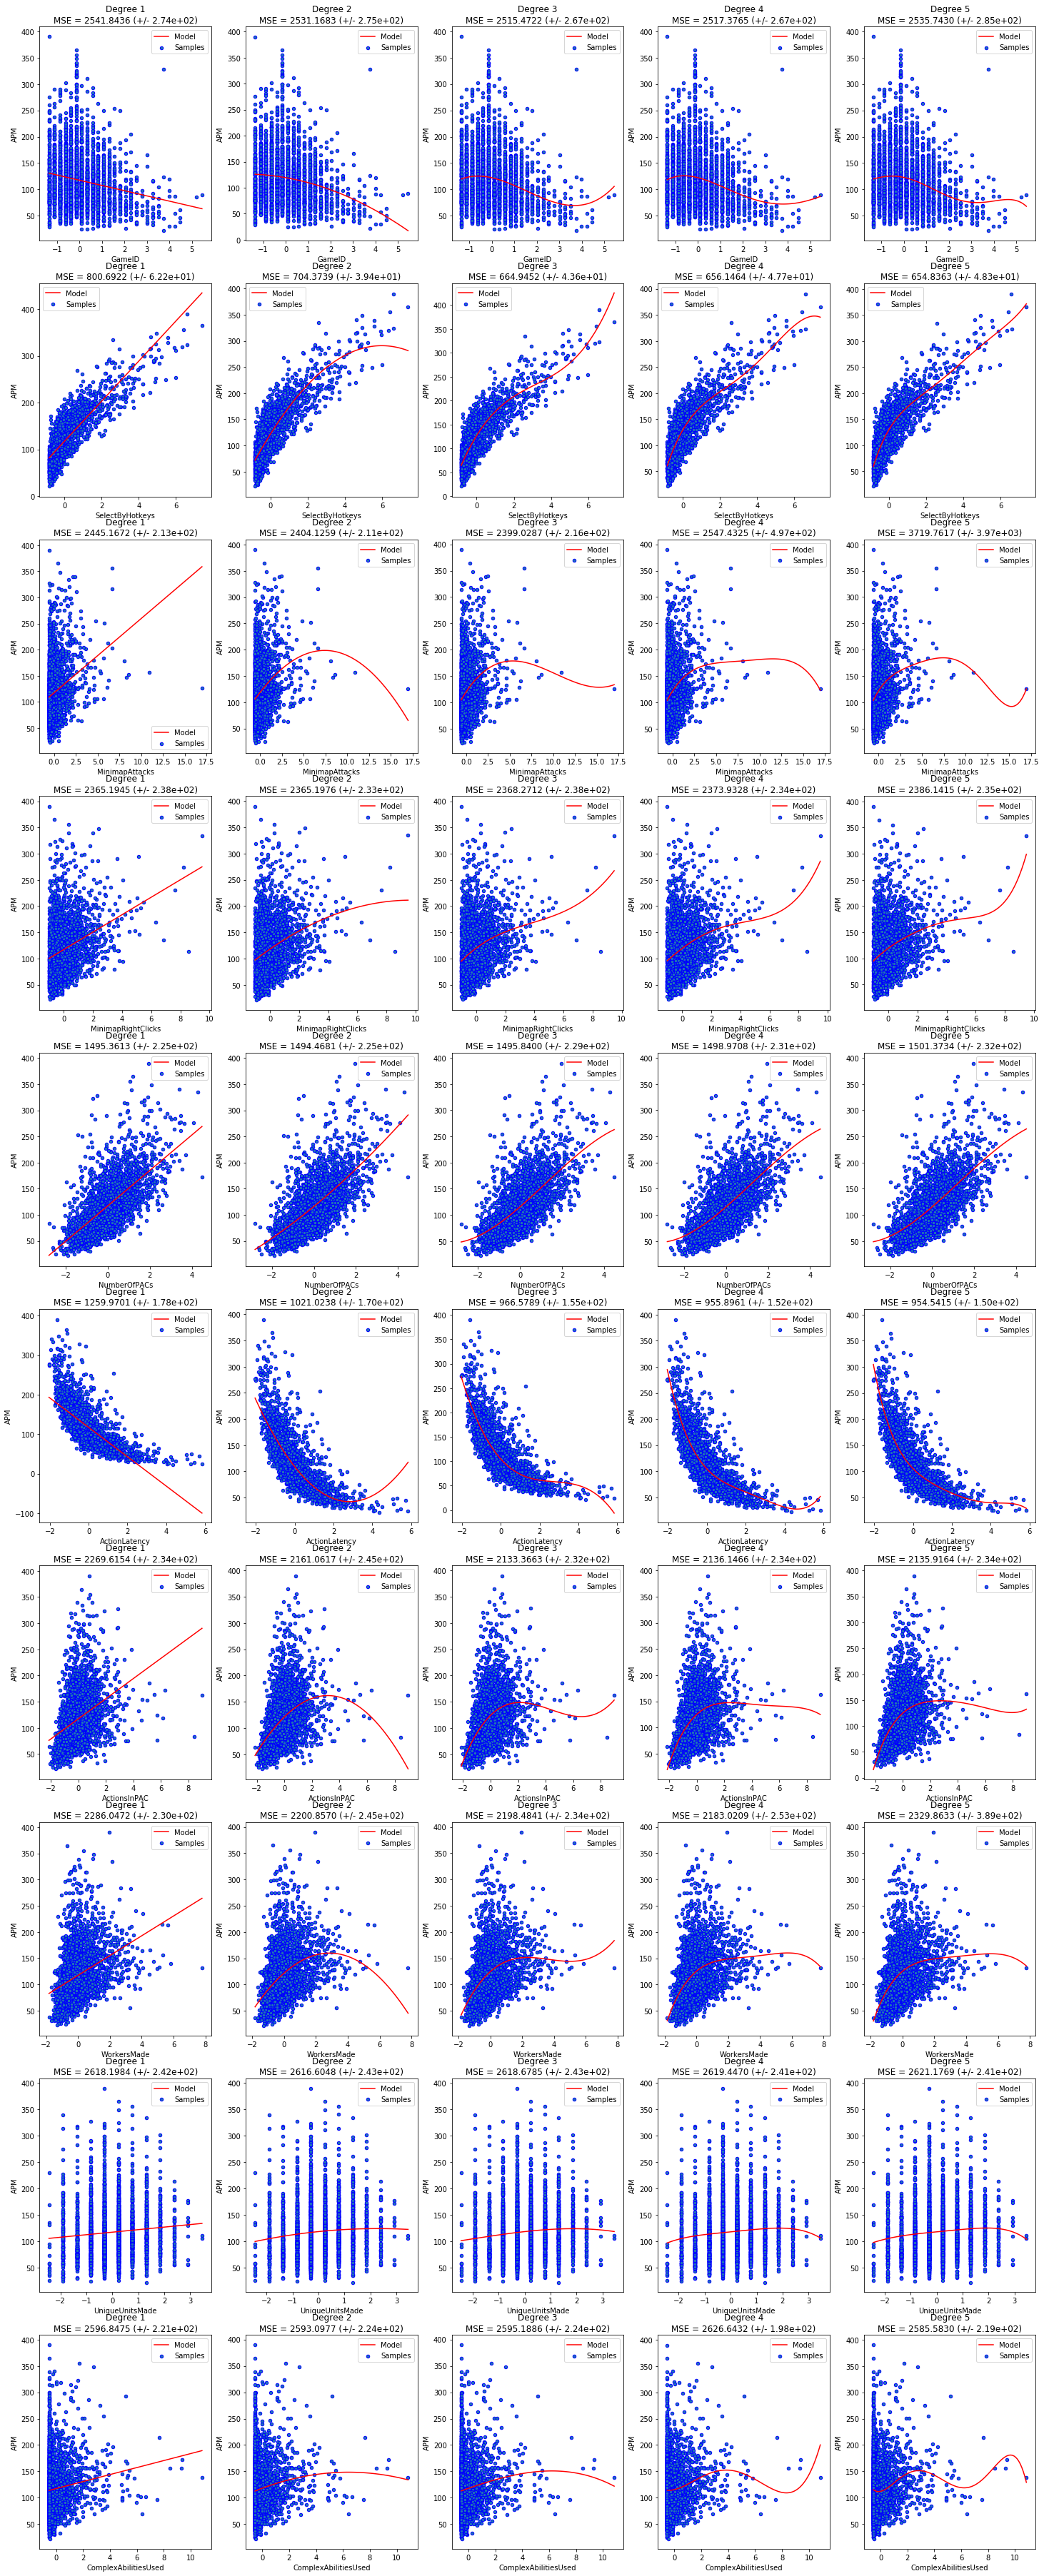

In [23]:
plot_regression(predictors, [1, 2, 3, 4, 5], 65)

### MSE vs. degree of polynomial fit

Here we'll only take a look at the three features `NumberOfPACs`, `ActionLatency` and `SelectByHotkeys` for which cross-validation has resulted in the lowest MSE.

Mean Squared Errors (MSE)


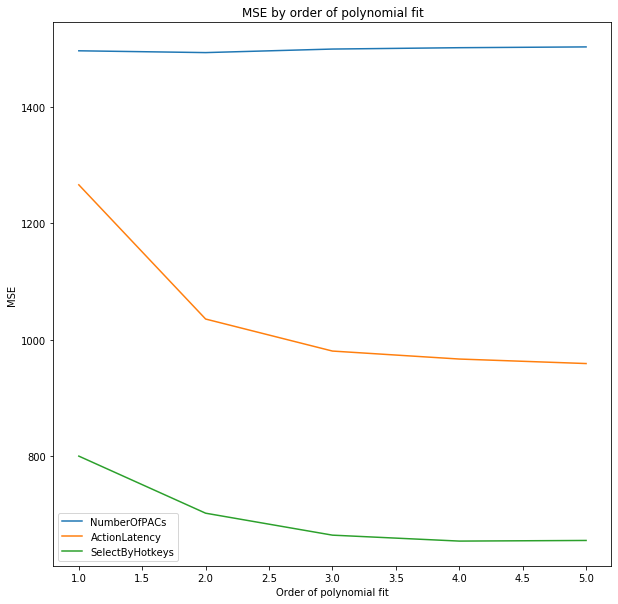

In [24]:
coefficients = {}
intercepts = {}
errors = {}

xs = np.arange(1,10,1)

poly_predictors = ["NumberOfPACs", "ActionLatency", "SelectByHotkeys"]
#poly_predictors = predictors
for predictor in poly_predictors:
    coefficients[predictor] = {}
    intercepts[predictor] = {}
    errors[predictor] = {}
    for i in range(5):
        linear_regression = LinearRegression()
        polynomial_features = PolynomialFeatures(degree=i+1,
                                                 include_bias=False)
        
        pipeline = Pipeline([("polynomial_features", polynomial_features),
                             ("linear_regression", linear_regression)])
        
        pipeline.fit(train_X[[predictor]], train_y)
        
        # Evaluate the models using crossvalidation
        errors[predictor][i+1] = -np.mean(cross_val_score(pipeline, train_X[[predictor]], train_y,
                                 scoring="neg_mean_squared_error", cv=3))
        

errors = pd.DataFrame(errors)
print("Mean Squared Errors (MSE)")

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(title="MSE by order of polynomial fit")
plt.plot(errors)
ax.set_xlabel("Order of polynomial fit")
ax.set_ylabel("MSE")
plt.legend(labels=errors.columns )
plt.show()

## Regularization

### The Lasso

In [25]:
lasso_alphas = 10**np.linspace(2, -3, 100)

parameters = {'alpha' : lasso_alphas}
lasso_grid = GridSearchCV(Lasso(random_state=42), param_grid=parameters, cv=10, n_jobs=-1, scoring='neg_mean_squared_error')
lasso_grid.fit(train_X, train_y)

/home/snbl/HDD/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=42,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'alpha': array([1.00000000e+02, 8.90215085e+01, 7.92482898e+01, 7.05480231e+01,
       6.280291...
       9.11162756e-03, 8.11130831e-03, 7.22080902e-03, 6.42807312e-03,
       5.72236766e-03, 5.09413801e-03, 4.53487851e-03, 4.03701726e-03,
       3.59381366e-03, 3.19926714e-03, 2.84803587e-03, 2.53536449e-03,
       2.25701972e-03, 2.00923300e-03, 1.78864953e-03, 1.59228279e-03,
       1.41747416e-03, 1.26185688e-03, 1.12332403e-03, 1.00000000e-03])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [26]:
-lasso_grid.best_score_

67.6622100008338

In [27]:
lasso_best_alpha = lasso_grid.best_estimator_.alpha
np.log10(lasso_best_alpha)

-0.9797979797979797

The best Lasso alpha-value is $\alpha \approx 10^{-1.03}$

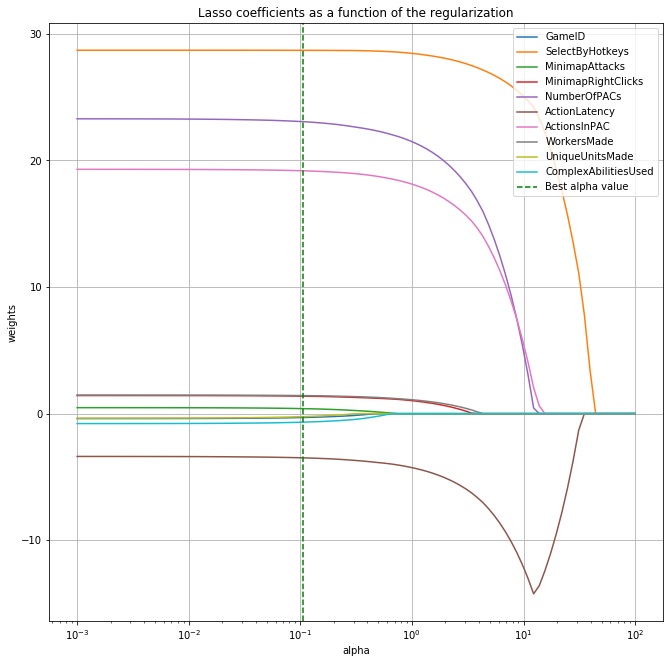

In [28]:
coefs = []
errors = {}
for a in lasso_alphas:
    lasso = Lasso(alpha=a)
    lasso.fit(train_X[predictors], train_y)
    coefs.append(lasso.coef_)
    errors[np.log10(a)] = -np.mean(cross_val_score(lasso, train_X[predictors], train_y, cv=10,
                               scoring="neg_mean_squared_error"))

plt.figure(figsize=(11,11))

ax = plt.gca()

ax.plot(lasso_alphas, coefs)
ax.set_xscale('log')
#ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization')
plt.axis('tight')

plt.axvline(x=lasso_best_alpha, color='g', linestyle='--')
plt.legend(labels=predictors + ["Best alpha value"])

#plt.yticks(np.arange(-2000, 20000, 1000))
plt.grid()
plt.show()

Again we can see that the most promissing features are `SelectByHotkeys`, `ActionLatency` and `NumberOfPACs`. Additionally `ActionsInPAC` takes until $\lambda = 10^1$ to vanish. It should be noted that we exclusivly fitted univariate models before.

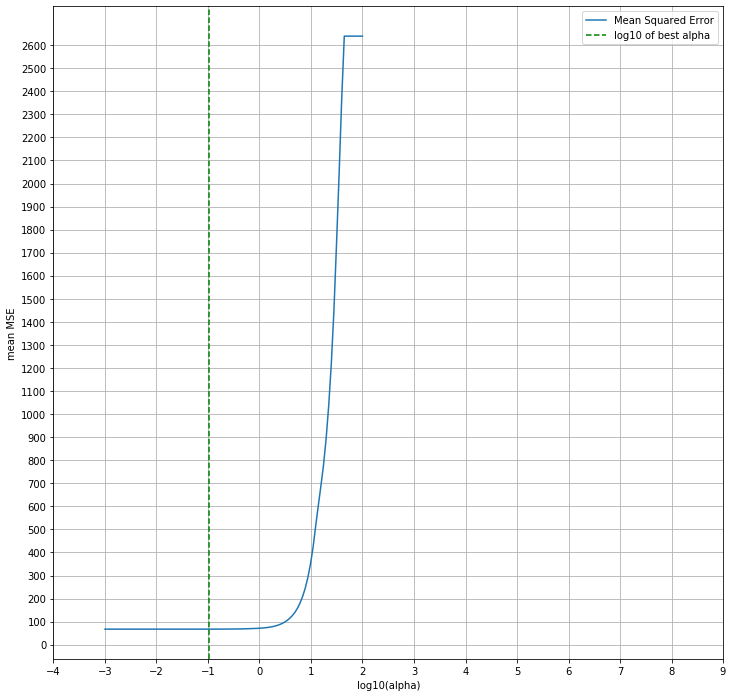

In [29]:
fig = plt.figure(figsize=(12,12))
ax = plt.plot(list(errors.keys()), list(errors.values()))
plt.grid(True)
plt.yticks(np.arange(0,2700, 100))
plt.xticks(np.arange(-4, 10, 1))
plt.axvline(x=np.log10(lasso_best_alpha), color='g', linestyle='--')
plt.legend(labels=["Mean Squared Error", "log10 of best alpha"])
plt.xlabel("log10(alpha)")
plt.ylabel("mean MSE")
plt.show()

### Ridge Regression

In [30]:
ridge_alphas = 10**np.linspace(-3, 8, 100)

parameters = {'alpha' : ridge_alphas}
ridge_grid = GridSearchCV(Ridge(random_state=42), param_grid=parameters, cv=10, n_jobs=-1, scoring='neg_mean_squared_error')
ridge_grid.fit(train_X, train_y)

/home/snbl/HDD/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=42,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=-1,
             param_grid={'alpha': array([1.00000000e-03, 1.29154967e-03, 1.66810054e-03, 2.15443469e-03,
       2.78255940e-03, 3.59381366e-03, 4.64158883e-03, 5.99484250e-03,
       7.7...
       7.74263683e+05, 1.00000000e+06, 1.29154967e+06, 1.66810054e+06,
       2.15443469e+06, 2.78255940e+06, 3.59381366e+06, 4.64158883e+06,
       5.99484250e+06, 7.74263683e+06, 1.00000000e+07, 1.29154967e+07,
       1.66810054e+07, 2.15443469e+07, 2.78255940e+07, 3.59381366e+07,
       4.64158883e+07, 5.99484250e+07, 7.74263683e+07, 1.00000000e+08])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

Ridge Regression has the lowest cross-validation MSE in our analysis.

In [31]:
-ridge_grid.best_score_

68.88458586935697

The best Ridge Regression alpha is $\alpha \approx 27.83$

In [32]:
ridge_best_alpha = ridge_grid.best_estimator_.alpha
ridge_best_alpha

27.825594022071257

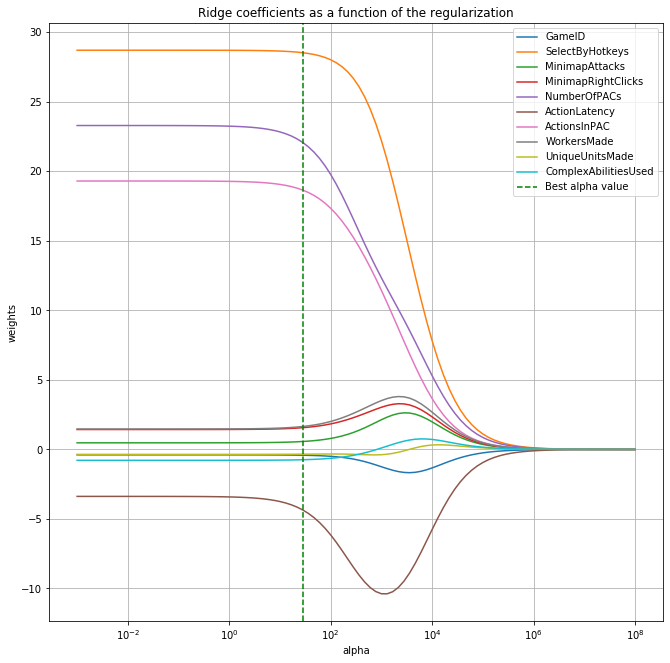

In [33]:
coefs = []
errors = {}
for a in ridge_alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(train_X[predictors],train_y)
    coefs.append(ridge.coef_)
    errors[np.log10(a)] = -np.mean(cross_val_score(ridge, train_X[predictors], train_y, cv=10,
                               scoring="neg_mean_squared_error"))


plt.figure(figsize=(11,11))
ax = plt.gca()
ax.plot(ridge_alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axvline(x=ridge_best_alpha, color='g', linestyle='--')
plt.axis('tight')
plt.grid()
plt.legend(labels=predictors + ["Best alpha value"])
plt.show()


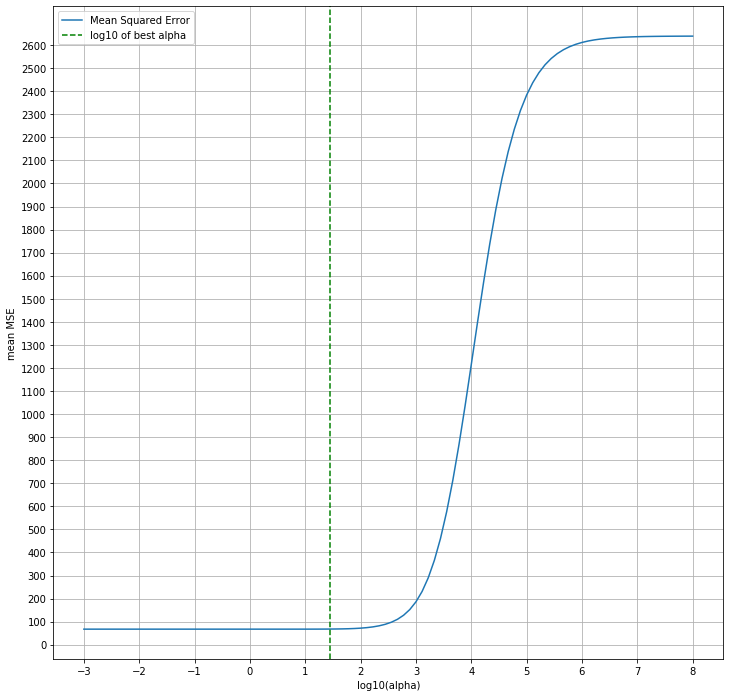

In [34]:
fig = plt.figure(figsize=(12,12))
ax = plt.plot(list(errors.keys()), list(errors.values()))
plt.xlabel("log10(alpha)")
plt.grid()
plt.ylabel("mean MSE")
plt.yticks(np.arange(0,2700, 100))
plt.xticks(np.arange(-3, 9, 1))
plt.axvline(x=np.log10(ridge_best_alpha), color='g', linestyle='--')
plt.legend(labels=["Mean Squared Error"] + ["log10 of best alpha"])
plt.show()

# Predicting on the test set
We have now found the best predictor for univariate linear regression vs. the response APM and optimal values for alpha in terms of Lasso and Ridge Regression. Let's see how models with those parameters perform on the test set.

In [35]:
test_X = pd.DataFrame(preprocessor.fit_transform(test_X), columns=test_X.columns)

### Linear Regression

In [36]:
lr = LinearRegression()
lr.fit(train_X[["SelectByHotkeys"]], train_y)
pred = lr.predict(test_X[["SelectByHotkeys"]])
mse = mean_squared_error(test_y, pred)
r2 = r2_score(test_y, pred)
print("MSE: {}\nr-squared: {}".format(mse, r2))

MSE: 779.2411048656975
r-squared: 0.7343884756211244


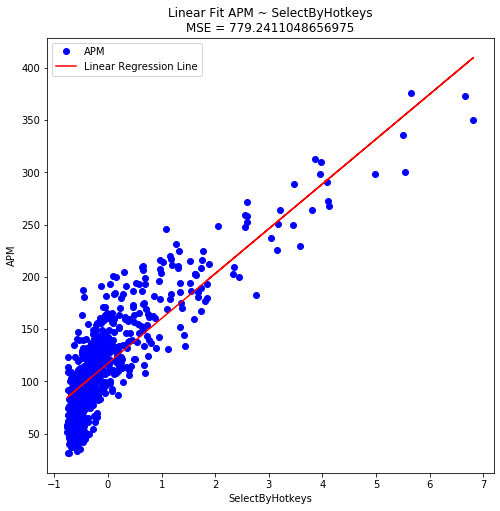

In [37]:
fig = plt.figure(figsize=(8,8))

plt.title("Linear Fit APM ~ SelectByHotkeys\nMSE = {}".format(mse))
plt.xlabel("SelectByHotkeys")
plt.ylabel("APM")
plt.plot(test_X["SelectByHotkeys"], test_y, 'bo', label="APM")
plt.plot(test_X["SelectByHotkeys"], pred, 'r-', label="Linear Regression Line")
plt.legend()
plt.show()

### Polynomial Regression

We found that `SelectByHotkeys` had the lowest training MSE in terms of univariate polynomial regression with degree 4.

In [38]:
pr = PolynomialRegression(4)

pr.fit(train_X[["SelectByHotkeys"]], train_y)
pred = pr.predict(test_X[["SelectByHotkeys"]])
mse = mean_squared_error(test_y, pred)
r2 = r2_score(test_y, pred)
print("MSE: {}\nr-squared: {}".format(mse, r2))

MSE: 644.6825738315251
r-squared: 0.780253993139388


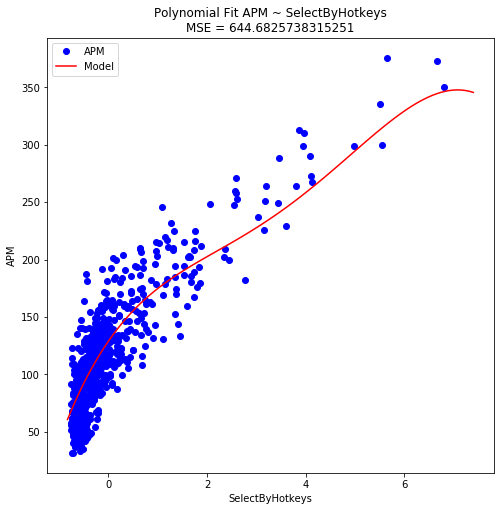

In [39]:
fig = plt.figure(figsize=(8,8))

plt.title("Polynomial Fit APM ~ SelectByHotkeys\nMSE = {}".format(mse))
plt.xlabel("SelectByHotkeys")
plt.ylabel("APM")
plt.plot(test_X["SelectByHotkeys"], test_y, 'bo', label="APM")
xs = np.linspace(np.min(train_X[predictor]), np.max(train_X[predictor]), 100)
plt.plot(xs, pr.predict(xs.reshape(-1,1)), 'r-', label="Model")
plt.legend()
plt.show()

### The Lasso

The lowest overall training MSE we found with the Lasso. Let's see how good it performs in predicting the test data. 

In [40]:
lasso = Lasso(alpha=lasso_best_alpha)
lasso.fit(train_X, train_y)
pred = lasso.predict(test_X)
mse = mean_squared_error(test_y, pred)
r2 = r2_score(test_y, pred)
print("MSE: {}\nr-squared: {}".format(mse, r2))

MSE: 67.80077211461263
r-squared: 0.9768894809026651


### Ridge Regression

With Ridge Regression we also could reduce the training MSE by a lot. Let's finally check how our Ridge Regression model performs on test data.

In [41]:
ridge = Ridge(alpha=ridge_best_alpha)
ridge.fit(train_X, train_y)
pred = ridge.predict(test_X)
mse = mean_squared_error(test_y, pred)
r2 = r2_score(test_y, pred)
print("MSE: {}\nr-squared: {}".format(mse, r2))

MSE: 69.36678817493576
r-squared: 0.9763556898713823
